# Titanic - Machine Learning from Disaster

__Predict survival on the Titanic and get familiar with ML basics__

_See more: https://www.kaggle.com/c/titanic_

__Legends__

| Variable   | Definition           | Key
|:---        |:---                  |:---
| survival   | Survival             | 0 = No, 1 = Yes
| pclass     |  Ticket class        |1 = 1st, 2 = 2nd, 3 = 3rd
| embarked   | Port of Embarkation  | C = Cherbourg, Q = Queenstown, S = Southampton


**Passenger fare**

| Class      | Price
|:---        |:---
| 1st        | between £30 and £870
| 2nd        | mean £13
| 3nd        | £3–£8

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Get the data

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

__Show the first head rows of train dataset__

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


__Show the first head rows of test dataset__

In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore the data

__Show detail about features__

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


__Percentage of missing values__

In [7]:
mv_train = df_train.isnull()
pct_mv_train = mv_train.mean() * 100
round(pct_mv_train, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
mv_test = df_test.isnull()
pct_mv_test = mv_test.mean() * 100
round(pct_mv_test, 2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

__Describe train dataset__

_here we can find some contradition in the data like noisiness and type of noise (stochastic, outliers, rounding errors, etc.)_

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Understanding "Sex" Feature

__Total between women and men__

In [11]:
df_train.groupby(["Sex"]).size().reset_index(name='Total')

,Sex,Total
0,female,314
1,male,577


In [12]:
df_test.groupby(["Sex"]).size().reset_index(name='Total')

,Sex,Total
0,female,152
1,male,266


__Shows details about total of passengers and non-survivors by sex and class__

In [23]:
df_total_sex_pclass = df_train.groupby(["Sex", "Pclass"]).size().reset_index(name='Total')
df_non_survivor_sex_pclass = df_train[df_train["Survived"] == 0].groupby(["Sex", "Pclass"]).size().reset_index(name='Total')

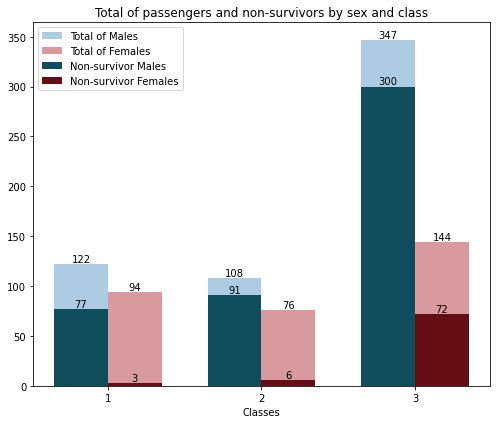

In [29]:
classes = df_total_sex_pclass["Pclass"].unique()

total_males = df_total_sex_pclass[df_total_sex_pclass["Sex"] == "male"]["Total"].values
total_females = df_total_sex_pclass[df_total_sex_pclass["Sex"] == "female"]["Total"].values
non_survivor_males = df_non_survivor_sex_pclass[df_non_survivor_sex_pclass.Sex == "male"]["Total"].values
non_survivor_females = df_non_survivor_sex_pclass[df_non_survivor_sex_pclass.Sex == "female"]["Total"].values

fig, ax = plt.subplots(figsize=(7, 6))

w_bar = 0.35
lb_loc = np.arange(len(classes))
colors = ["#adcbe3", "#d89a9e", "#0f4c5c", "#640d14"]

bar_total_males = ax.bar(lb_loc - w_bar/2, total_males, w_bar, label="Total of Males", color=colors[0])
bar_total_females = ax.bar(lb_loc + w_bar/2, total_females, w_bar, label="Total of Females", color=colors[1])
bar_non_survivor_males  = ax.bar(lb_loc - w_bar/2, non_survivor_males, w_bar, label="Non-survivor Males", color=colors[2])
bar_non_survivor_females = ax.bar(lb_loc + w_bar/2, non_survivor_females, w_bar, label="Non-survivor Females", color=colors[3])

ax.bar_label(bar_total_males)
ax.bar_label(bar_total_females)
ax.bar_label(bar_non_survivor_males)
ax.bar_label(bar_non_survivor_females)

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.legend()
ax.set_xlabel("Classes")
ax.set_xticks(lb_loc, classes)
ax.set_title("Total of passengers and non-survivors by sex and class")

fig.tight_layout()

### Understanding "Fare" Feature

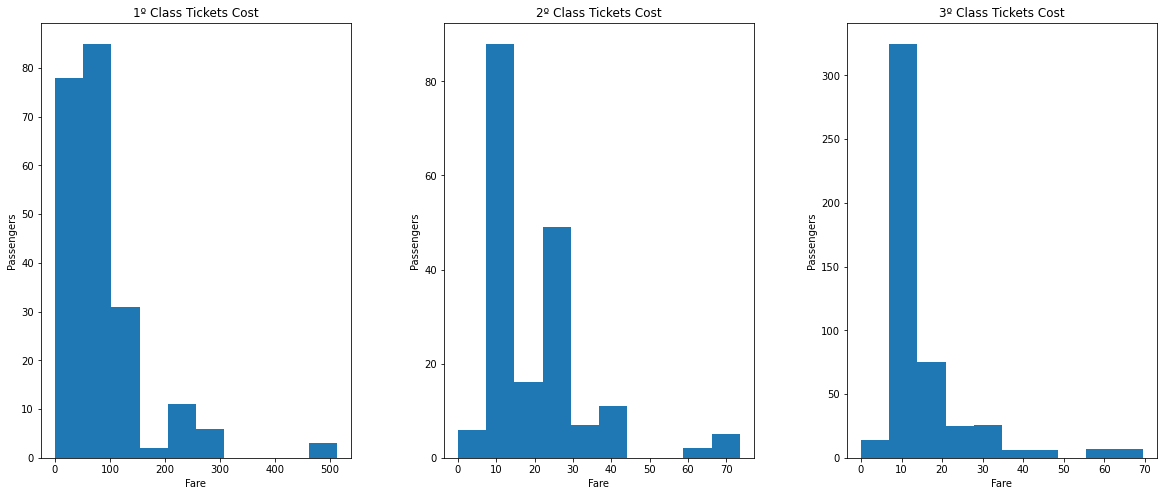

In [15]:
nclass = 3
fig, axes = plt.subplots(1, nclass, figsize=(20, 8))

for i in range(nclass):
    pclass = i + 1
    dataframe = df_train[df_train.Pclass == pclass]
    dataframe.hist(column="Fare", bins=10, ax=axes[i])
    
    axes[i].grid(False)
    axes[i].set_xlabel('Fare')
    axes[i].set_ylabel('Passengers')
    axes[i].set_title('{}º Class Tickets Cost'.format(pclass))

In [16]:
def lsmx_fare(dataframe, pclass):
    """
    List all passengers who have  paid the maximum ticket price per class.
    """
    dfclass = dataframe[dataframe.Pclass == pclass]
    maxfare = dfclass.Fare.max()
    return dfclass[dfclass.Fare == maxfare]

In [17]:
pd.concat([
    lsmx_fare(df_train, 1),
    lsmx_fare(df_train, 2),
    lsmx_fare(df_train, 3)
])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [18]:
# df_train_third["Fare"].max() / df_train_third["SibSp"]